<a href="https://colab.research.google.com/github/ledanhan/MNIST-handwritten-classification/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install numpy
!pip install matplotlib
!pip install keras
!pip install tensorflow
!pip install matplotlib-venn

In [7]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist

In [8]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)


In [9]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)
print(X_train.shape[0])

(50000, 28, 28, 1)
50000


In [10]:
# 4. One hot encoding label (Y)
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)
# Ví dụ với số 5
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
# 5. Định nghĩa model
model = Sequential()
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())
# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))
# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(10, activation='softmax'))

In [13]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',

optimizer='adam',
metrics=['accuracy'])

In [14]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),

batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 18s 5ms/step - loss: 0.3109 - accuracy: 0.9114 - val_loss: 0.0675 - val_accuracy: 0.9824
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0556 - accuracy: 0.9844 - val_loss: 0.0461 - val_accuracy: 0.9877
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0344 - accuracy: 0.9905 - val_loss: 0.0481 - val_accuracy: 0.9859
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0221 - accuracy: 0.9942 - val_loss: 0.0379 - val_accuracy: 0.9894
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0152 - accuracy: 0.9958 - val_loss: 0.0403 - val_accuracy: 0.9886
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0098 - accuracy: 0.9975 - val_loss: 0.0440 - val_accuracy: 0.9867
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0405 - val_accuracy

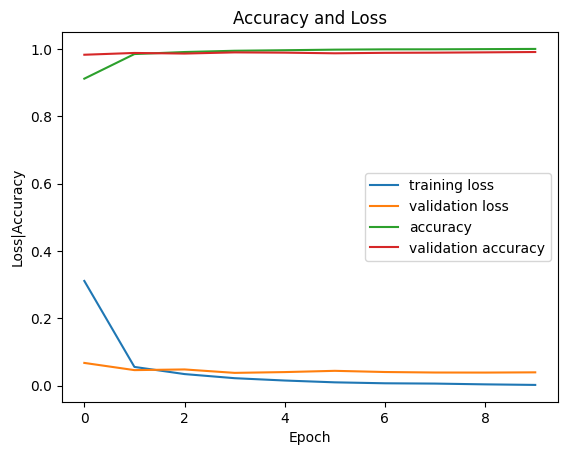

In [15]:
# 8. Vẽ đồ thị loss, accuracy của training set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [16]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03672723099589348, 0.9901000261306763]


1/1 [==============================] - 0s 18ms/step
Giá trị dự đoán:  3


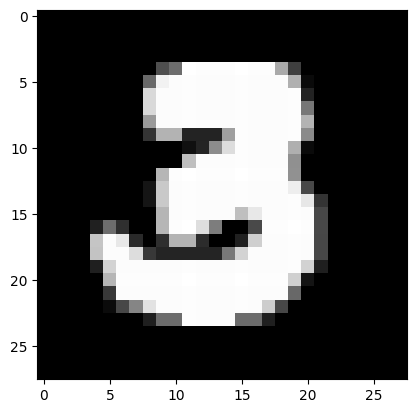

In [31]:
# 10. Dự đoán ảnh
plt.imshow(X_test[200].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test[200].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))